# Radial Basis Function (RBF) Networks

In [207]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
import numpy.linalg as LA

## The XOR Problem 

$(0,0) \mapsto 0$                
$(0,1) \mapsto 1$   
$(1,0) \mapsto 1$   
$(1,1) \mapsto 0$ 

The problem is to find a function which correctly classifies these four data points. That seems easy, but remember that a perceptron can't do it because it assumes the classes are linearly separable - try draw a line in the plane separating class 0 from class 1. See plot below of the situation. 

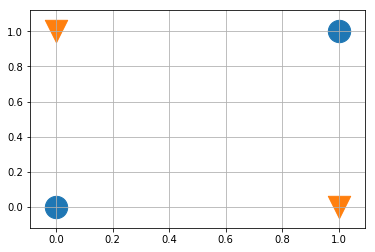

In [208]:
plt.scatter([0,1], [0,1], s = 500)
plt.scatter([1,0], [0,1], s = 500, marker = 'v')
plt.grid()



The prediction function is given by a linear combination of distances from the centroids (after applying function $\Phi$):
$$ F(x) = \sum_{i} w_i \Phi(|| x - c_i||) $$

Lets pick the centroids to be the data points themselves (the four corners), i.e. 

$c_1 = (0,0) $    
$c_2 = (0,1)$    
$c_3 = (1,0)$    
$c_4 = (1,1)$

Lets take the case when $\Phi$ is just the identity function. The possibilities $|| x - c_i ||$ can be written up in a matrix. 

$$
\left(
\begin{array}{cc} 
0  & 1 & 1 & \sqrt{2} \\ 
1  & 0 & \sqrt{2} & 1 \\
1  & \sqrt{2} & 0 & 1 \\
\sqrt{2}  & 1 & 1 & 0 
\end{array}
\right)
\left(
\begin{array}{cc} 
w_1 \\
w_2 \\
w_3 \\
w_4  
\end{array}
\right)    
= 
\left( \begin{array}{cc} 1 \\ 0 \\ 0 \\ 1  \end{array} \right) 
$$ 

Each column in the matrix represents a centroid, and the values are the distances from the centroid. Finding the weights is now simple matrix inversion! Let's calculate the answer in code, and see what we get. 

In [209]:
Phi = np.array([[0, 1, 1, np.sqrt(2)], 
               [1, 0, np.sqrt(2), 1], 
               [1, np.sqrt(2), 0, 1], 
               [np.sqrt(2), 1, 1, 0]])
w = np.dot(LA.inv(Phi), [1,0,0,1])

Now we can implement the prediction function $F$

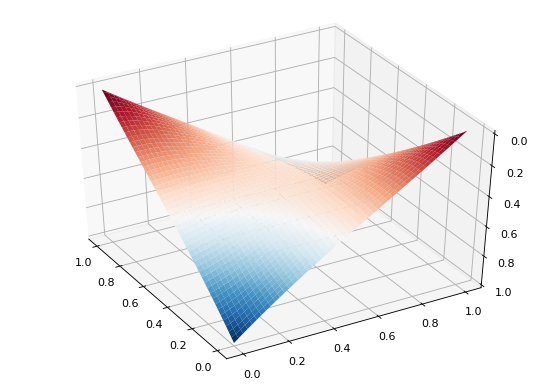

In [210]:

c = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
def F(x,y):
    d = [LA.norm([x,y] - ci) for ci in c]
    return np.dot(w, d)

fig = plt.figure(figsize=(8.5, 6), dpi= 80, facecolor='w', edgecolor='k')
# fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(X, Y)
Z = np.vectorize(F)(X,Y)
surf = ax.plot_surface(X, Y, Z, cmap='RdBu')
fig.canvas.draw()
ax.view_init(-140, 30)

Boom! This function correctly reproduces the XOR function at the corner values. Lets think of this function as
performing a classification onto the classes {0,1} by checking if the value if less than or greater than 0.5. 

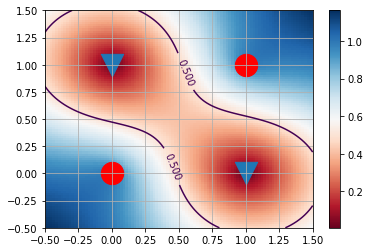

In [211]:
X = np.linspace(-0.5, 1.5, 100)
Y = np.linspace(-0.5, 1.5, 100)
X, Y = np.meshgrid(X, Y)
Z = np.vectorize(F)(X,Y)
plt.pcolor(X,Y,Z, cmap='RdBu')
plt.colorbar()
cntr = plt.contour(X,Y,Z, levels = [0.5])
plt.clabel(cntr, inline=1, fontsize=10)
plt.scatter([0,1], [0,1], s = 500, c = 'r')
plt.scatter([1,0], [0,1], s = 500, marker = 'v')
plt.grid()

## Practice computing distances 

Quit the play. Let's see if we can do things with real data. 

5D data: 

In [212]:
import scipy.io as io
centres = io.loadmat("sem6_q1_centres")['centres']
data = io.loadmat("sem6_q1_points")['points']
centres.shape

(10, 5)

We have a 5D data set and a set of 10 centre points. Let's write a function to compute the distance to each centre of a point.  

In [213]:
# get distances from single point to centroids 
def get_dists(centres, point):
    "get distance to each centre from a point"
    result = np.zeros(centres.shape[0])
    for i in range(centres.shape[0]):
        result[i] = LA.norm(centres[i]-point)
    return result 
# print example
# print("distance to centres from first datapoint: \n %r" % get_dists(centres, data[0]) )

def get_all_dists(centres, points):
    pts = points.shape[0]
    ctrs = centres.shape[0]
    result = np.zeros([pts, ctrs])
    for i in range(pts):
        result[i,:] = get_dists(centres, points[i,:])
    return result
 
alldists = get_all_dists(centres, data)
alldists

array([[2.99194053, 2.23076502, 2.45184493, 2.63933798, 2.05330453,
        3.26839509, 2.01685253, 3.19610455, 2.57417132, 3.86293324],
       [2.637693  , 1.71906435, 1.99881049, 2.52347916, 1.8408796 ,
        3.49981346, 1.21086686, 3.58675734, 2.71728204, 3.36885062],
       [3.45644075, 2.12674254, 1.85740184, 2.57027841, 1.3703749 ,
        3.37242293, 1.40519507, 3.45048794, 2.50134659, 3.26176927],
       [4.50944507, 3.27332635, 1.81907716, 2.08877908, 1.81161394,
        3.92816348, 2.34932921, 3.55645131, 3.48261693, 4.5622717 ],
       [4.15480843, 2.60891013, 3.34289709, 4.28833057, 3.00935607,
        2.87539133, 3.2573526 , 2.74591137, 4.29585357, 3.74986249],
       [2.95977411, 1.96918313, 2.26266087, 3.48380673, 1.59263072,
        2.25693767, 2.12723981, 2.6697573 , 2.53571035, 3.65267432],
       [4.03138881, 2.62127119, 3.16868844, 4.53895067, 2.67062358,
        3.10283231, 2.91835364, 3.61759023, 3.64651637, 3.21540596],
       [3.32298219, 2.71832733, 3.4197223

Compare this to scipy's cdist function

In [214]:
import scipy.spatial.distance as dst

result = dst.cdist(data, centres)
result - alldists < 0.0001

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True, 

What do you know, looks like we agree.

## Write an RBF for the sin function

Generate random data following sin curve

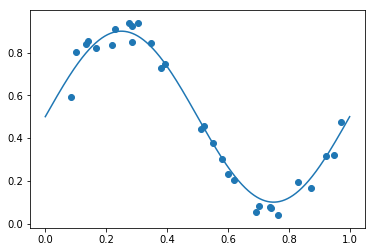

In [215]:
def f(x):
    return 0.5 + 0.4*np.sin(2*np.pi*x)
# sin curve 
x = np.linspace(0,1, 1000)
y = f(x)
# generate data 
n = 30 
X = np.random.rand(n)
Y = f(X) + np.random.normal(size = n, scale =  0.05)
X = np.array([X, Y]).T

plt.plot(x,y)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Use the data points themselves as centres to achieve *exact interpolation*. We get a 30 x 30 matrix of distances from each point to each other

In [216]:
centres = X[:,0].reshape(-1,1) # centres = data itself
dists = dst.cdist(centres, centres)
dists.shape

(30, 30)

### Approach 1: Use data points themselves as centroids (with Gaussian activation)

** result = overfitting**

This is the basic formula 
$$ F(x) = \sum_{i} w_i \Phi(|| x - c_i||) $$
Or in matrix form, and given training vector $y$, that's just: 
$$ \Phi w = y$$
So, compute $\Phi$ using gaussian kernel, invert it and multiply by $y$!

In [217]:
import scipy.stats as st 

Phi = st.norm.pdf(dists, scale = 0.05)
w_gauss = np.dot(LA.inv(Phi), X[:,1]) 
w_gauss

array([-8.36148422e+02, -5.85448729e+04,  1.96528103e+06, -8.35197817e+02,
        1.77866541e+05,  1.10301393e+05, -5.91540109e+05,  2.98633065e+02,
       -1.67985638e+06, -9.08653214e+04,  3.96732566e+05,  9.98280329e+04,
       -2.38707404e+05, -2.42921701e+06,  8.95300566e+02, -9.41531674e+04,
        5.61648564e+05,  1.36354473e+05, -2.48116873e+09, -1.12847289e+05,
        5.42634197e+04, -7.82114071e+04,  2.46250087e+09, -5.73785900e+05,
       -4.07005792e+06,  1.19339935e+03,  2.32244454e+07, -1.58922806e+04,
        1.26885465e+05,  1.84685199e+06])

Woop! The model is trained. Lets apply it to see what we got.  

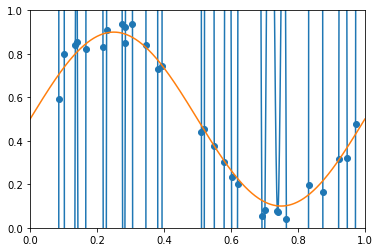

In [218]:
def F(X, centres, w, f_a):
    """applies the RBF function
    X = input 
    w = weight vector 
    f_a = activation function (must work on arrays)
    """
    # compute distances to centroids 
    D = dst.cdist(X, centres)
    # apply activation function 
    Phi = f_a(D)
    # answer is matrix multiplication by weight vector 
    result = np.dot(Phi, w)
    return result

x = np.linspace(0, 1, 1000)
y = f(x)
yp = F(x.reshape(-1,1), centres, w_gauss, lambda x : st.norm.pdf(x, scale = 0.05) )

plt.plot(x,yp)
plt.plot(x,y)
plt.scatter(X[:, 0], X[:, 1])
plt.axis([0,1,0,1])
plt.show()

Mad overfitting! Wild oscillations... This is no good and clearly won't generalize well. 

### Approach 2: Same thing, Linear activation


**result = overfitting**

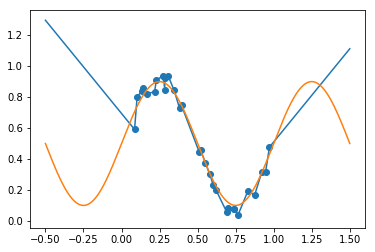

In [219]:
# train 
Phi = dists
w_lin = np.dot(LA.inv(Phi), X[:,1]) 

# predict 
x = np.linspace(-0.5, 1.5, N).reshape(-1,1)
y = f(x)
yp = F(x, centres, w_lin, lambda x: x)
plt.plot(x,yp)
plt.plot(x,y)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

That's a little better - now the trained function draws straight lines between training data. 

### Approach 3: Get fewer centroids using K-means

Now let's do the right thing and train with respect to fewer clusters (so that we don't overfit). 

The approach here is to use K-means clustering (an unsupervised algorithm) to cluster the input data for us - then use these clusters as our centroids. 

#### compute centers using kmeans

In [253]:
from sklearn.cluster import KMeans

# **CHANGE THIS** pick number of cluster 
c = 6
model = KMeans(n_clusters=c)
model.fit(X[:,0].reshape(-1,1))
predictions = model.labels_
centers = model.cluster_centers_
centers

array([[0.9094874 ],
       [0.26613422],
       [0.56400362],
       [0.72772959],
       [0.12623038],
       [0.37383018]])

#### train weights 

In [254]:
# **CHANGE THIS** pick activation function! 
activation = lambda x : st.norm.pdf(x, scale = 0.2)
# activation = lambda x: x

# train 
X[:,0].reshape(-1,1).shape
dists = dst.cdist(X[:,0].reshape(-1,1), centers)
Phi = activation(dists)
w_kmeans = np.dot(LA.pinv(Phi), X[:,1])
w_kmeans

array([ 0.49898898,  1.01214993,  0.78859849, -0.76912817, -0.09383651,
       -0.79803312])

#### predict

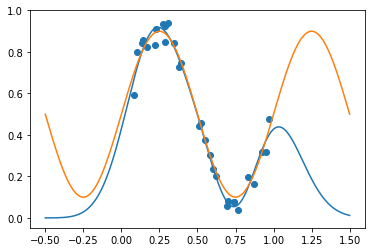

In [255]:
# predict 
x = np.linspace(-0.5, 1.5, N).reshape(-1,1)
y = f(x)
yp = F(x, centers, w_kmeans, activation)
plt.plot(x,yp)
plt.plot(x,y)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Bloody fantastic!! Well done gang. 